In [1]:
import pandas as pd
import numpy as np
import math
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.pyplot as plt

In [2]:
#1

In [3]:
p_values = np.array([0.002,0.0045,0.006,0.008,0.0085,0.009,0.0175,0.025,0.1055,0.5350])

In [4]:
def bonferroni_correction(p_values):
    N = len(p_values)
    p_values = list(p_values*N)
    pi = []
    less = []
    for i in p_values:
        if i >= 1:
            pi.append(1)
        else:
            pi.append(i)
    for i in pi:
        if i < (0.05):
            less.append(True)
        else: 
            less.append(False)
    return(pi, less)

In [5]:
#Test with written function.
bonferroni_correction(p_values)

([0.02, 0.045, 0.06, 0.08, 0.085, 0.09, 0.17500000000000002, 0.25, 1, 1],
 [True, True, False, False, False, False, False, False, False, False])

In [6]:
#Test with existing function from SciPy pakage.
p_function = multipletests(p_values, method='bonferroni')
print(p_function[0])

[ True  True False False False False False False False False]


In [7]:
#2

In [8]:
data = np.loadtxt('p_Group3.txt')

In [9]:
data.shape

(9000,)

In [10]:
#p_values with significance at the level of 0.05 before Bonferroni.
count = 0
for i in data:
    if i <0.05:
        count+=1 
print(count)

2380


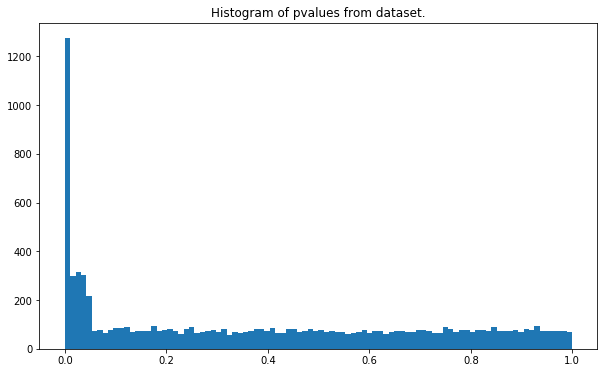

In [11]:
plt.figure(figsize=(10,6))
x=len(data)
bins = math.sqrt(x)
plt.hist(data,bins=int(bins))
plt.title('Histogram of pvalues from dataset.')
plt.show()

In [12]:
#p_values with significance at the level of 0.05 by my Bonferroni function
significant_pvalues = bonferroni_correction(data)

In [13]:
true_count = sum(significant_pvalues[1])

In [14]:
print('Number of p_values with significance at the level of 0.05: {}'.format(true_count))

Number of p_values with significance at the level of 0.05: 987


In [15]:
#p_values with significance at the level of 0.05 by existing function from Scipy package.

In [16]:
p_function = multipletests(data, method='bonferroni')

In [17]:
true_count1 = sum(p_function[0])

In [18]:
print('Number of p_values with significance at the level of 0.05: {}'.format(true_count1))

Number of p_values with significance at the level of 0.05: 987
